# Logistic Regression

## Imports 

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, learning_curve, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibrationDisplay, calibration_curve
from sklearn.calibration import CalibratedClassifierCV

In [2]:
df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Model evaluation

In [3]:
X = df[['Pclass','SibSp','Parch','Fare']]
y = df['Survived']
model = LogisticRegression()
cv_scores = cross_val_score(model, X, y, cv=5)
accuracy = cv_scores.mean()
accuracy

0.6835791852363318

In [4]:
cv_result = cross_validate(model,X, y, cv=5)
accuracy =  cv_result['test_score'].mean()
accuracy

0.6835791852363318

# 2. In-depth diagnosis

In [5]:
train_sizes=np.linspace(0.1, 1.0, 10)
train_sizes
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

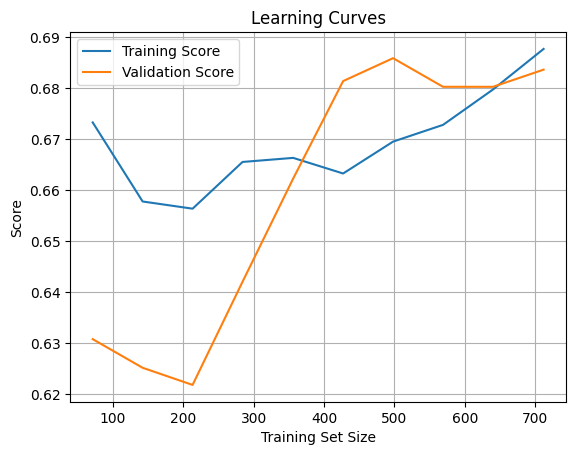

In [6]:
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show();

# 3. Reduced training size

In [7]:
reduced_training_size = int(X.shape[0] * 0.6)
X_reduced = X[:reduced_training_size]
y_reduced = y[:reduced_training_size]

model.fit(X_reduced, y_reduced)
reduced_training_accuracy = model.score(X_reduced, y_reduced)
reduced_training_accuracy

0.6573033707865169

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
reduced_training_accuracy = accuracy_score(y_test, y_pred)
reduced_training_accuracy

0.6852791878172588

# 4. Predictions

In [9]:
person = pd.DataFrame({
    'Pclass': [1],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [15]
})

X = df[['Pclass','SibSp','Parch','Fare']].sample(500, random_state=42)
y = df['Survived'].sample(500, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

prediction = model.predict(person)
prediction

array([1], dtype=int64)

In [10]:
probabilities = model.predict_proba(person)

probabilities
probability = probabilities[0][1]
probability

0.5360750688173275

# 5 Optional - Model Calibration

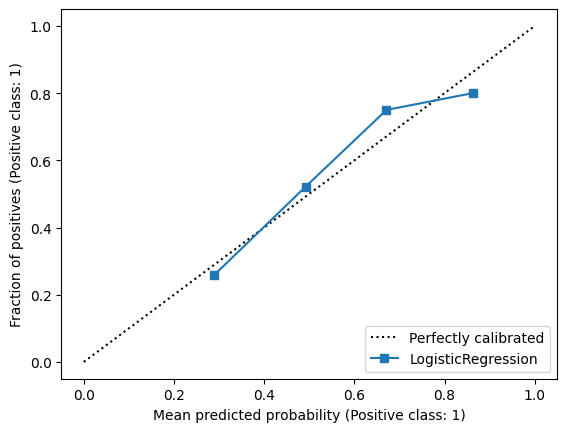

In [11]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.5, random_state=1)

# Fit a model on the train set
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

disp = CalibrationDisplay.from_estimator(model, X_test, y_test)

In [12]:
base_model = LogisticRegression(max_iter=1000)
calibrated = CalibratedClassifierCV(base_model, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
calibrated_prediction = calibrated.predict(np.array(person).reshape(1,-1))
calibrated_probabilities = calibrated.predict_proba(np.array(person).reshape(1,-1))
calibrated_probability = calibrated_probabilities[0][1]
calibrated_probability


0.5091258107749457